<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT FARE PREDICTION
    </h2>
    </div>

![](https://feeds.abplive.com/onecms/images/uploaded-images/2021/09/08/634259599cd6f60c24f9e67a5680c064_original.jpg)

<p>
    An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.</p>
    
<p>
    Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.</p>
    
<p>
    The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.
</p>

In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets see what is in the Data
df = pd.read_csv('../Cleaned_dataset.csv')
df.head()

Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955

In [3]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [4]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [5]:
# Stastical Description of Data
df.describe()

Duration_in_hours      Days_left           Fare
count      452088.000000  452088.000000  452088.000000
mean           12.349222      25.627902   22840.100890
std             7.431478      14.300846   20307.963002
min             0.750000       1.000000    1307.000000
25%             6.583300      13.000000    8762.750000
50%            11.333300      26.000000   13407.000000
75%            16.500000      38.000000   35587.000000
max            43.583300      50.000000  143019.000000

In [6]:
df.corr().T

Duration_in_hours  Days_left      Fare
Duration_in_hours           1.000000  -0.032878  0.179909
Days_left                  -0.032878   1.000000 -0.087852
Fare                        0.179909  -0.087852  1.000000

In [7]:
# Size of the data 
df.shape

(452088, 13)

In [8]:
df = df.dropna()
df.drop_duplicates( keep=False, inplace=True)
df = df.reset_index(drop = True)
df.shape

(440087, 13)

In [9]:
df1=df.groupby(['Airline','Flight_code'],as_index=False).count()
df1.Airline.value_counts()

Indigo         702
Air India      171
Vistara        165
AirAsia        106
GO FIRST       104
SpiceJet        92
AkasaAir        51
AllianceAir     10
StarAir          4
Name: Airline, dtype: int64

<b> Indigo becaming as a most popular Airline

In [10]:
df2 = df.groupby(['Flight_code','Airline','Class'],as_index=False).count()
df2['Class'].value_counts()

Economy            1401
Business            295
Premium Economy     137
First                 3
Name: Class, dtype: int64

<b> Most of the Airlines has Economic Class as common

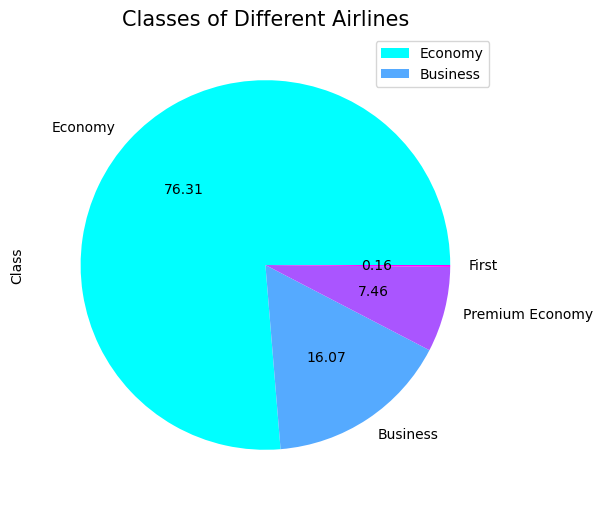

In [11]:
plt.figure(figsize=(8,6))
df2['Class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<b> Do prices vary with Airlines?</b>

<p>
    
<ul>
    <li>As we can see Vistara has Maximum Price range</li>
    <li>Vistara and Air_India Airlines Have Maximum Price when compared to Others</li>
    <li>SpiceJet , AirAsia , GO_First and Indigo has some what equal prices</li>  
    
</ul>
</p>

In [12]:
fig = px.box(df, y = "Fare", x = 'Airline', color_discrete_sequence = ["orange"], template = 'seaborn')
fig.show()

<p>
    <b> Does the Ticket Price vary between Economy and Business Class?</b>
   
<ul> 
    <li>Ticket Price is Maximum for Bussiness Class When compared to Economy Class</li>
</ul>
    </p>

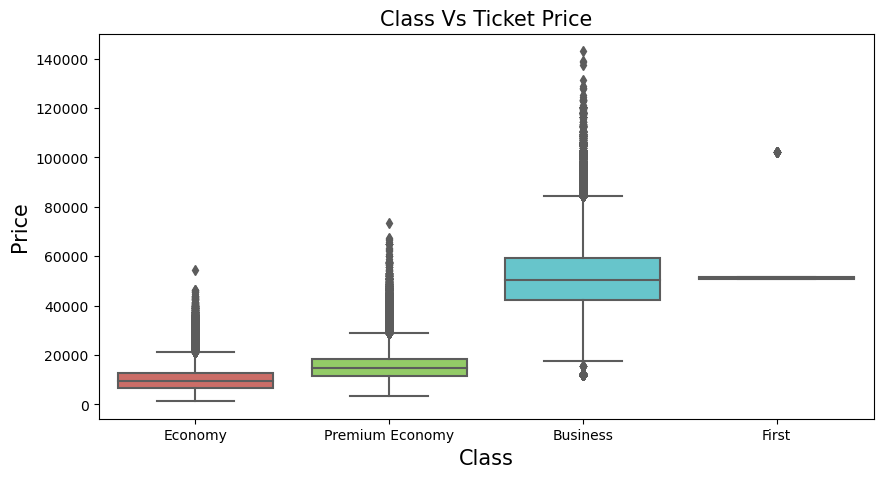

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class',y='Fare',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> How Does the Ticket Price vary with the number of stops of a Flight?</b>

<p> 
<ul><li>Flights having one stop has maximum ticket price</li></ul>
</p>

In [14]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

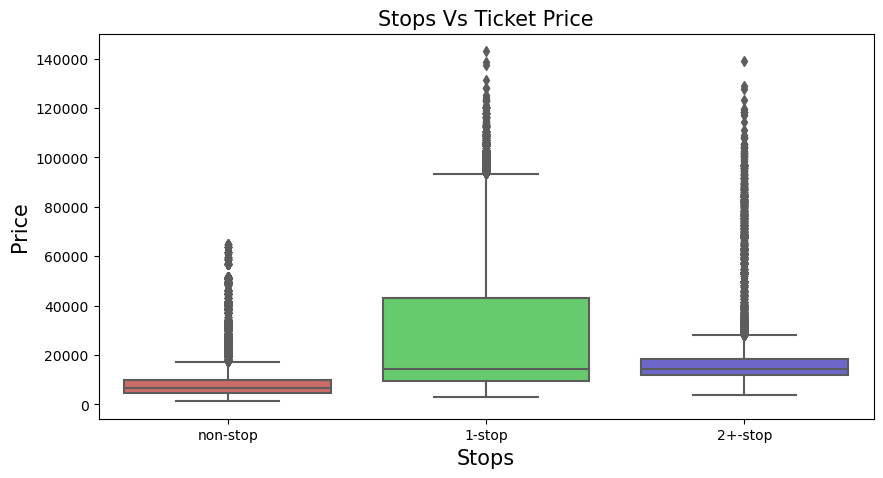

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_stops',y='Fare',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    
<b> How the Ticket Price change based on the Departure Time and Arrival Time?</b><br>

    
<b>1. Departure Time Vs Ticket Price</b>

   <ul>
   <li> Ticket Price is More for the Flights when the Departure Time is at Night</li>
   <li>Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening</li>
   <li>Ticket Price is Low for the Flights Having Departure Time at Late_night</li>
   </ul>
    
 
 
<b>2. Arrival Time Vs Ticket Price</b>

   <ul>
    <li>Ticket Price is More for the Flights when the Arrival Time is at Evening</li>
    <li>Ticket Price is almost equal for flights Having Arrival time is at Morning and Night</li>
   <li>Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time</li>
    </ul>
 </p>

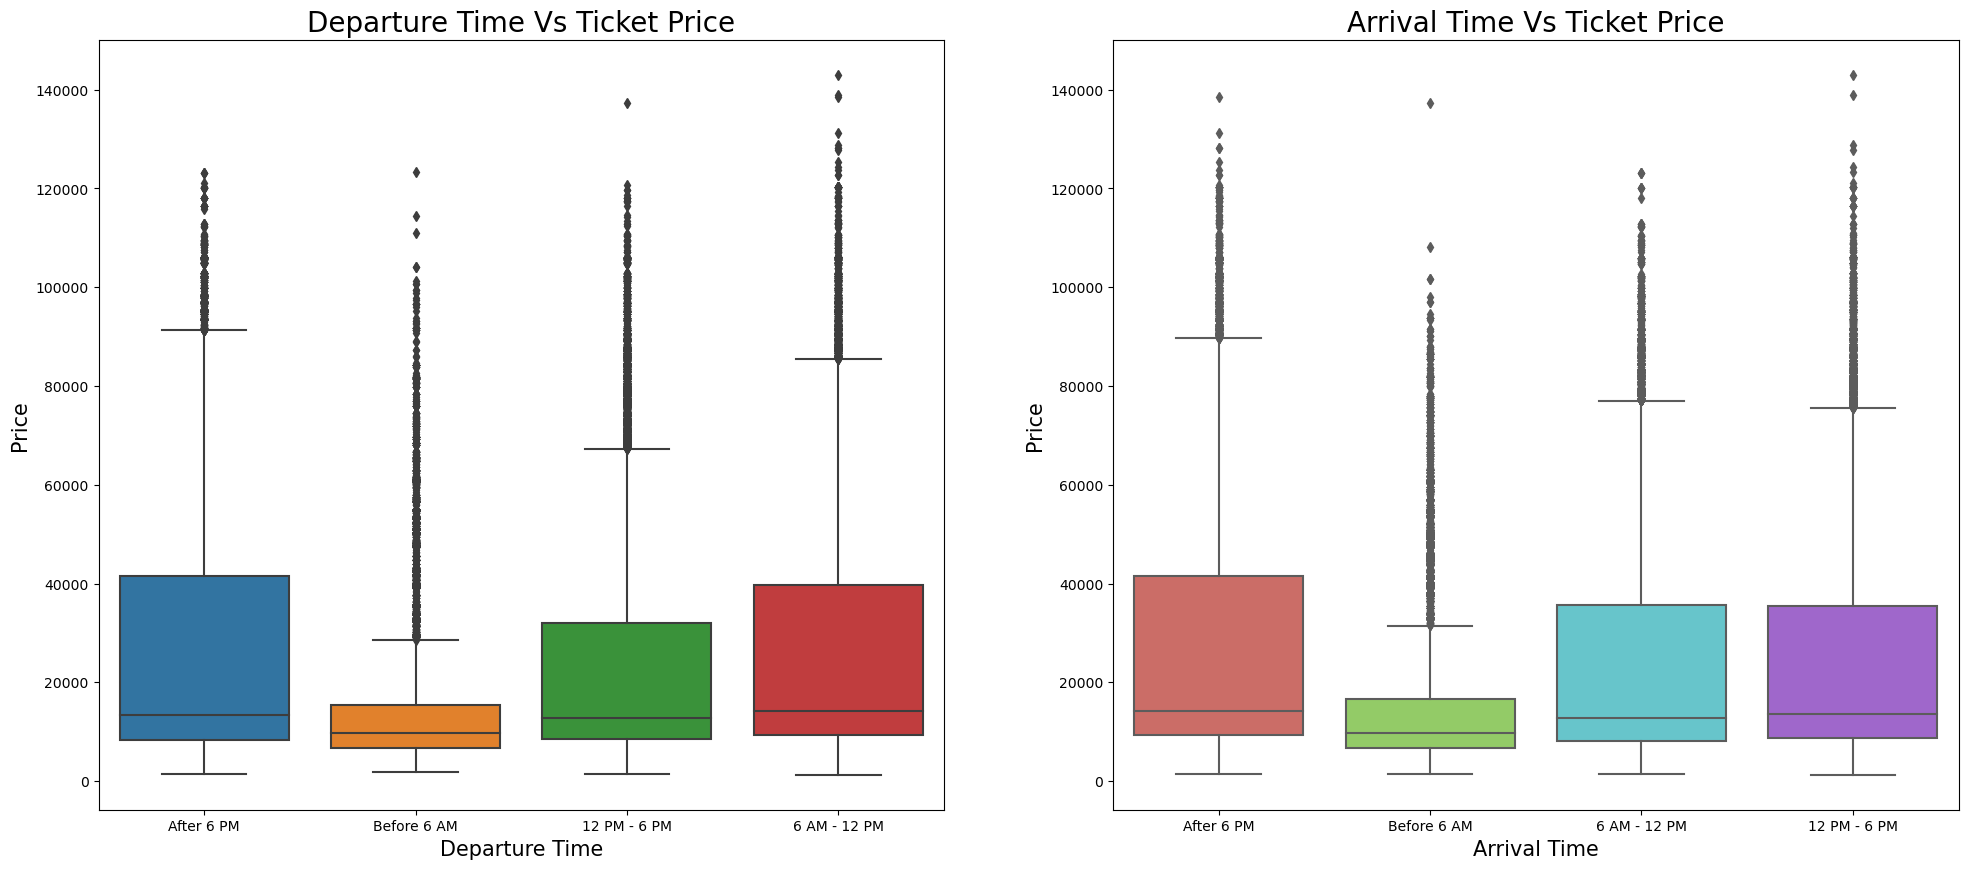

In [16]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Departure',y='Fare',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Arrival',y='Fare',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
<b> How the price changes with change in Source city and Destination city?</b><br>
    
<b>1. Source City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Source City is Kolkata</li>
   <li>Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore</li>
    <li> Ticket Price is Low for the Flights Having Source City as Delhi</li>
    
 
<b>2. Destination City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Destination City is kolkata and Chennai</li>
   <li> Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore</li>
   <li>Ticket Price is Low for the Flights Having Destination City as Delhi</li>
</p>

In [17]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

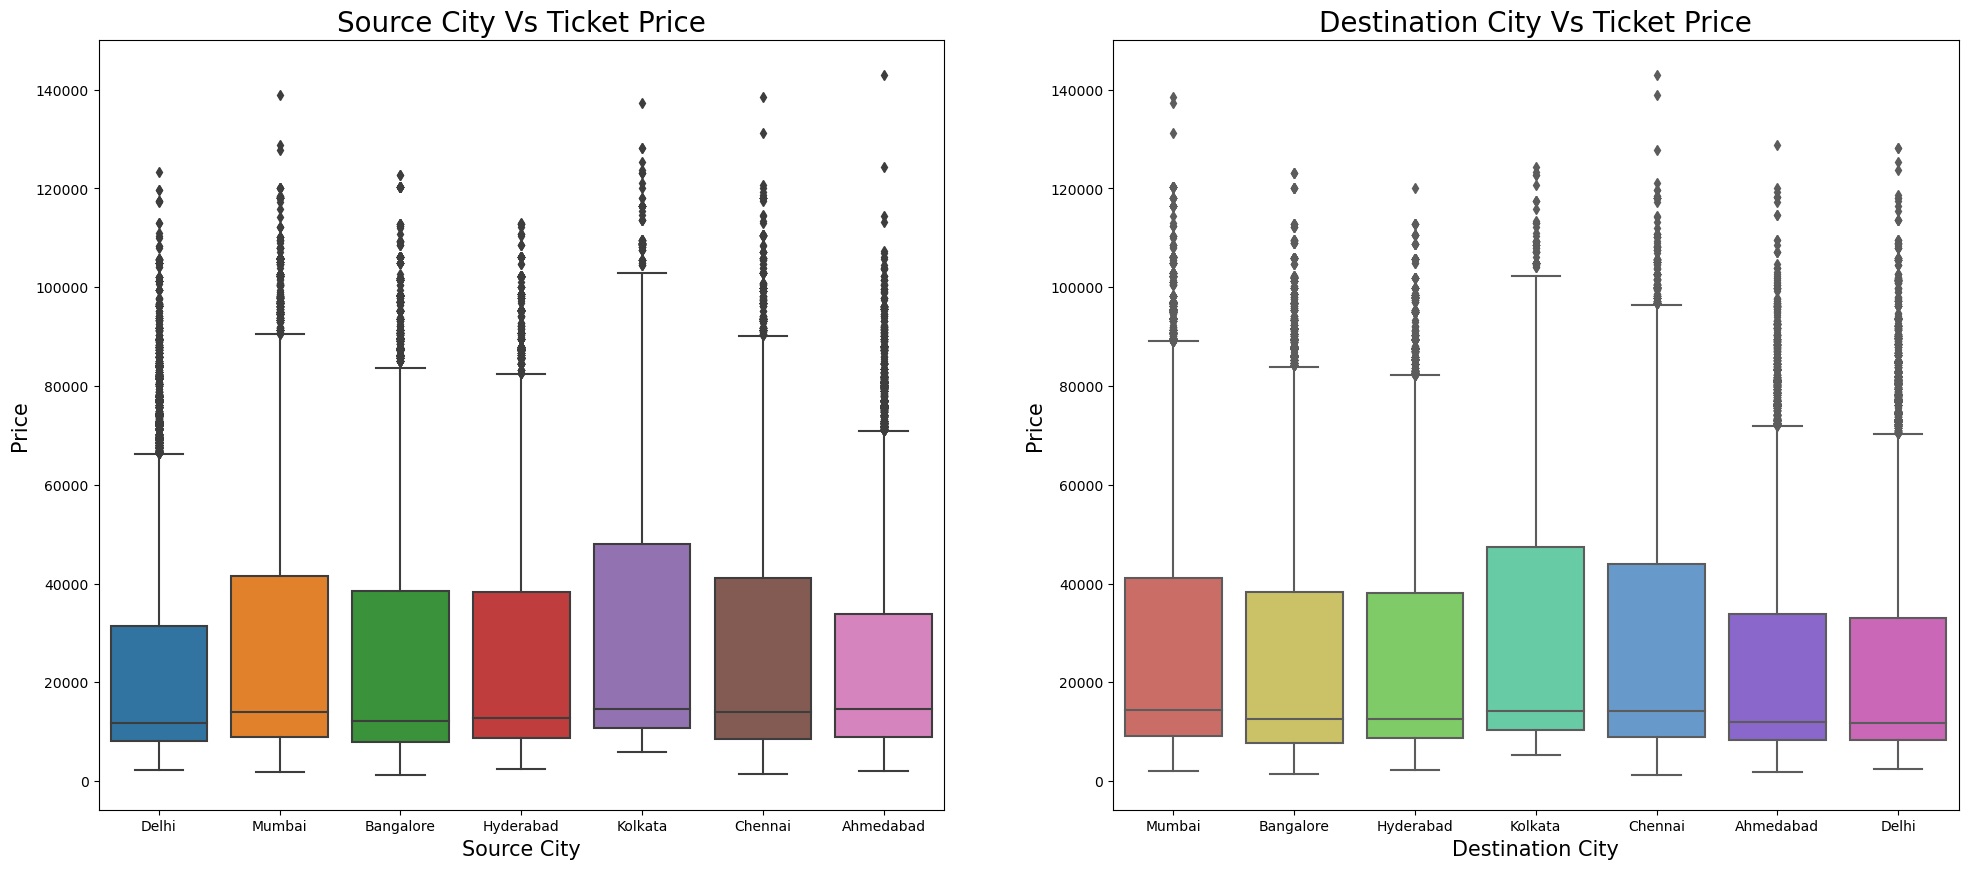

In [18]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Fare',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Fare',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How Price Varies with the Flight Duration Based on Class?</b>

<li> With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes</li>
</p>


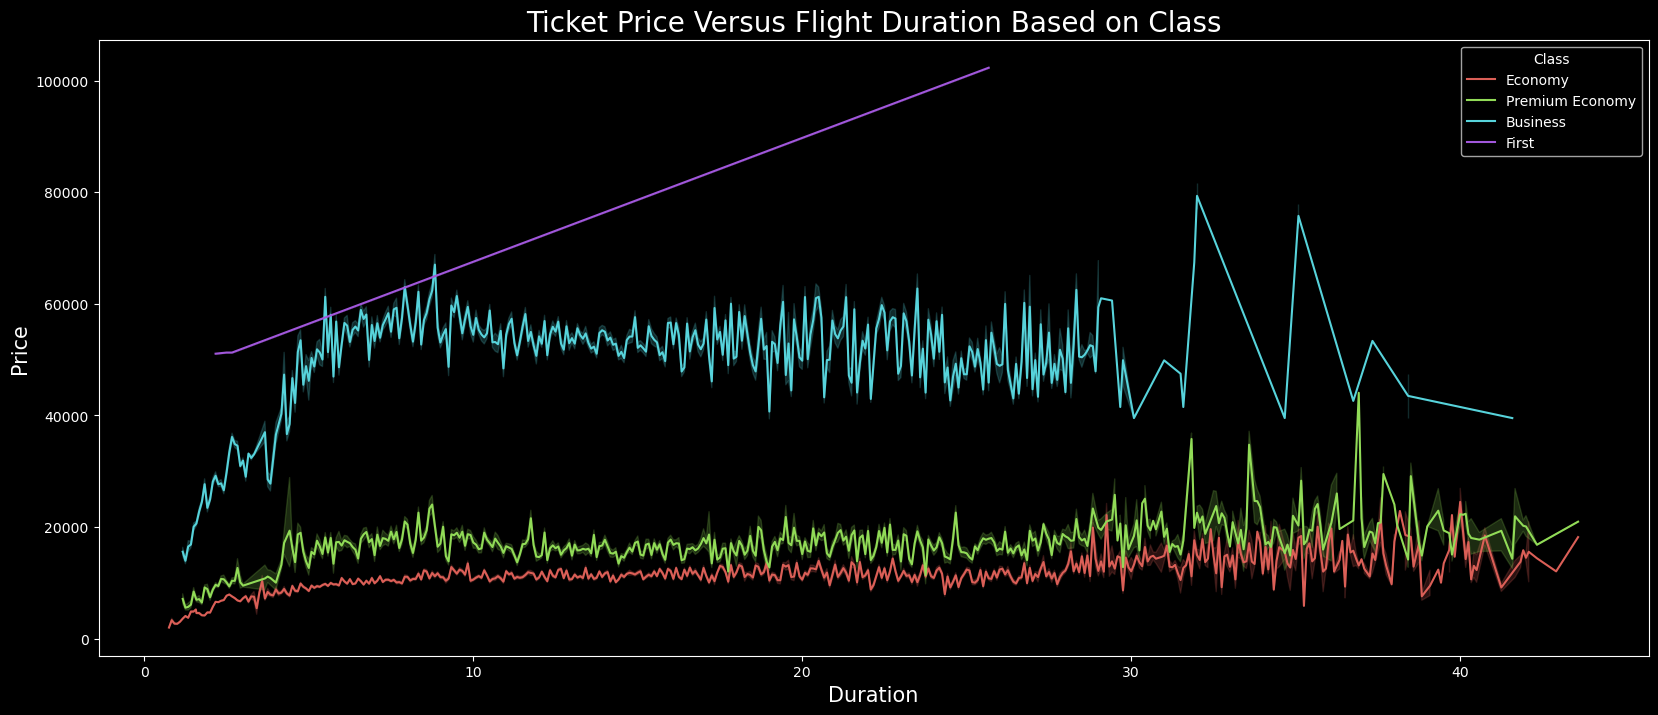

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data = df,x = 'Duration_in_hours',y = 'Fare',hue = 'Class',palette = 'hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize = 20)
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

<p>
    <b> How does the price affected on the days left for Departure?</b>
    
<li> As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines</li>
    
</p>

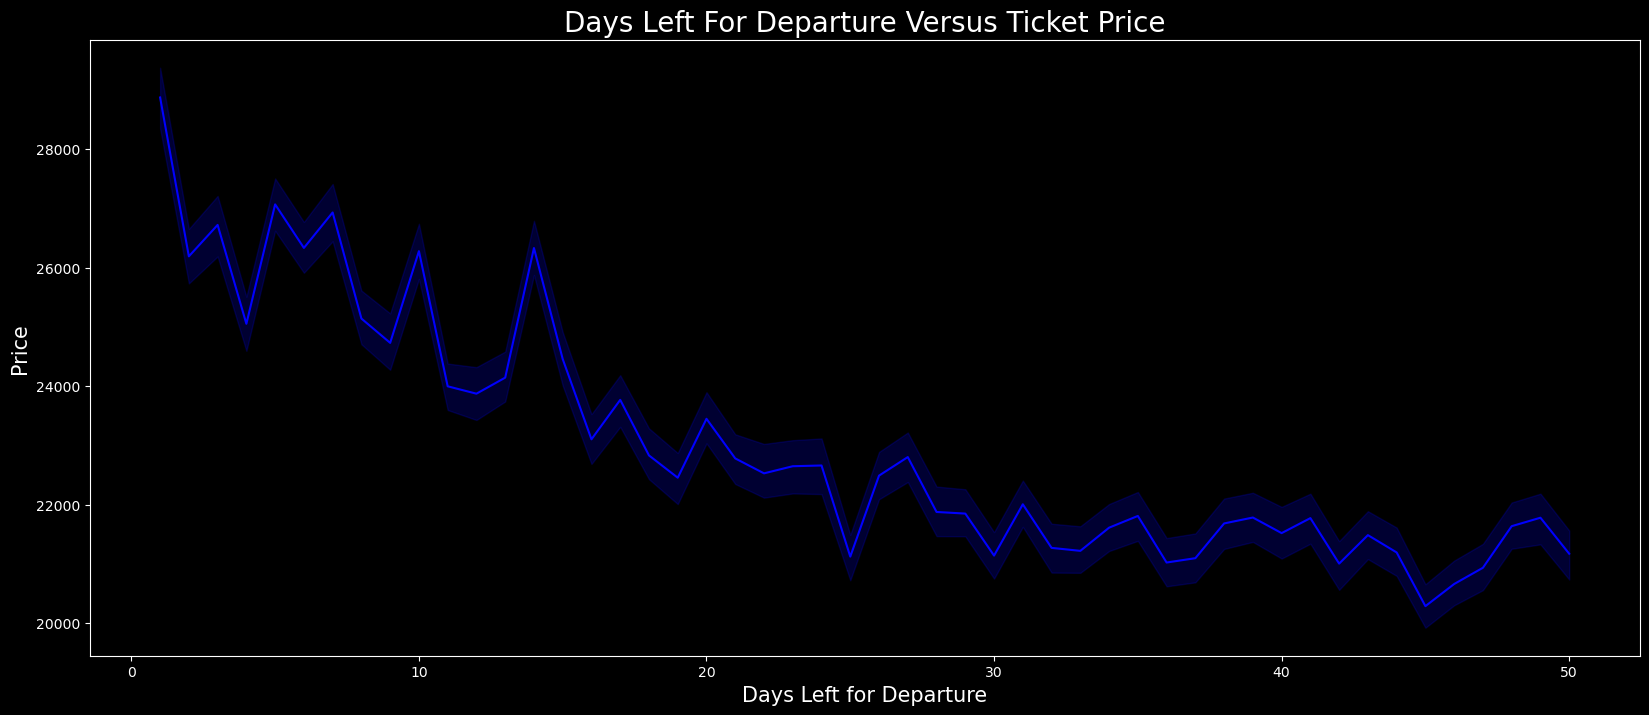

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Days_left',y='Fare',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

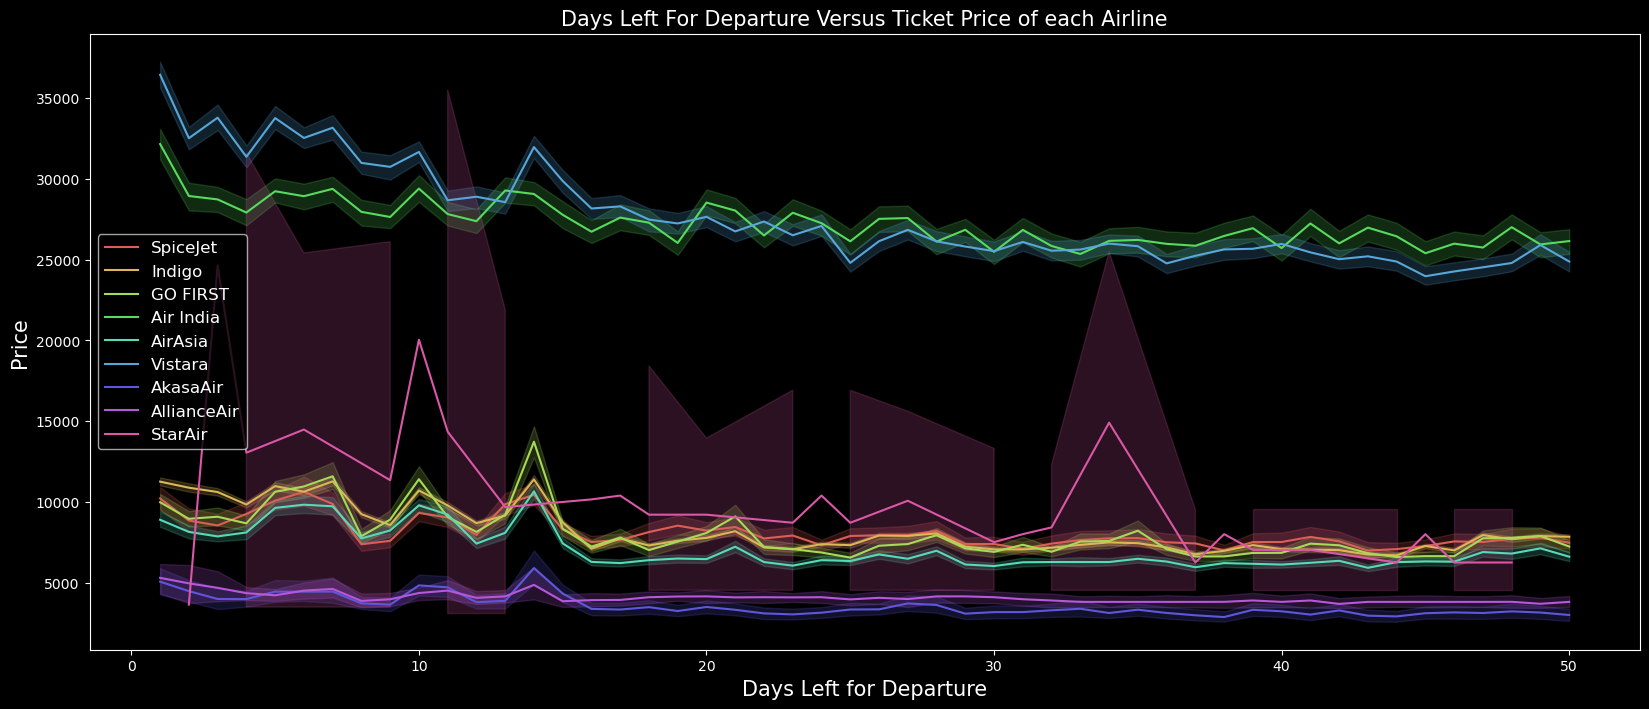

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Days_left',y='Fare',color='blue',hue='Airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> Total number of Flights from one city to another</b>

In [22]:
df.groupby(['Flight_code','Source','Destination','Airline','Class'],as_index=False).count().groupby(['Source','Destination'],as_index=False)['Flight_code'].count().head(10)

Source Destination  Flight_code
0  Ahmedabad   Bangalore           85
1  Ahmedabad     Chennai           82
2  Ahmedabad       Delhi           64
3  Ahmedabad   Hyderabad           77
4  Ahmedabad     Kolkata           88
5  Ahmedabad      Mumbai           50
6  Bangalore   Ahmedabad          136
7  Bangalore     Chennai           97
8  Bangalore       Delhi          181
9  Bangalore   Hyderabad          119

<b> Average Price of different Airlnes from Source city to Destination city</b>

In [23]:
df.groupby(['Airline','Source','Destination'],as_index=False)['Fare'].mean().head(10)

Airline     Source Destination          Fare
0  Air India  Ahmedabad   Bangalore  30898.056017
1  Air India  Ahmedabad     Chennai  31986.554209
2  Air India  Ahmedabad       Delhi  25284.740260
3  Air India  Ahmedabad   Hyderabad  28618.727551
4  Air India  Ahmedabad     Kolkata  30114.170294
5  Air India  Ahmedabad      Mumbai  31228.560304
6  Air India  Bangalore   Ahmedabad  28063.483264
7  Air India  Bangalore     Chennai  28978.088460
8  Air India  Bangalore       Delhi  23134.751645
9  Air India  Bangalore   Hyderabad  27742.954733

In [24]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [25]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['Fare'],axis=1)
y=df['Fare']

In [26]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((308060, 12), (132027, 12), (308060,), (132027,))

In [27]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [28]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

Empty DataFrame
Columns: [Model Name, Mean_Absolute_Error_MAE, Adj_R_Square, Root_Mean_Squared_Error_RMSE, Mean_Absolute_Percentage_Error_MAPE, Mean_Squared_Error_MSE, Root_Mean_Squared_Log_Error_RMSLE, R2_score]
Index: []

In [29]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
#modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelETR, modelGBR, modelXGR, modelRE, modelLO]

for models in tqdm_notebook(MM):
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    #print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    # print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    # print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    # print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    # print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    # print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    # print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    # print('Adj R Square: ', adjusted_r_squared)
    # print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

  0%|          | 0/7 [00:00<?, ?it/s]

In [30]:
Results

Model Name  Mean_Absolute_Error_MAE  \
0                                 LinearRegression()             12360.309205   
1                            DecisionTreeRegressor()              2140.502406   
2  (ExtraTreeRegressor(random_state=1366604660), ...              1820.599658   
3  ([DecisionTreeRegressor(criterion='friedman_ms...              3945.987181   
4  XGBRegressor(base_score=0.5, booster='gbtree',...              2692.421932   
5                                            Ridge()             12362.211827   
6                                   Lasso(alpha=0.1)             12362.244481   

   Adj_R_Square  Root_Mean_Squared_Error_RMSE  \
0      0.461099                  15009.691412   
1      0.935622                   5187.824882   
2      0.963371                   3913.158256   
3      0.902126                   6396.605812   
4      0.948694                   4631.320153   
5      0.461041                  15010.488388   
6      0.461042                  15010.480087   

   Mean_Absolute_Percentage_Error_MAPE  Mean_Squared_Error_MSE  \
0                            92.826216            2.252908e+08   
1                             9.776462            2.691353e+07   
2                             8.434958            1.531281e+07   
3                            21.716427            4.091657e+07   
4                            13.999382            2.144913e+07   
5                            92.867585            2.253148e+08   
6                            92.868490            2.253145e+08   

   Root_Mean_Squared_Log_Error_RMSLE  R2_score  
0                           9.616451  0.461114  
1                           8.554070  0.935624  
2                           8.272100  0.963372  
3                           8.763523  0.902129  
4                           8.440597  0.948695  
5                           9.616504  0.461056  
6                           9.616504  0.461057

In [31]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

Model_Name  Adj_R_Square  Mean_Absolute_Error_MAE  \
0      RandomForestRegressor      0.963371              1820.599658   
1        ExtraTreesRegressor      0.948694              2692.421932   
2      DecisionTreeRegressor      0.935622              2140.502406   
3        KNeighborsRegressor      0.902126              3945.987181   
4           LinearRegression      0.461099             12360.309205   
5               XGBRegressor      0.461042             12362.244481   
6  GradientBoostingRegressor      0.461041             12362.211827   

   Root_Mean_Squared_Error_RMSE  Mean_Absolute_Percentage_Error_MAPE  \
0                   3913.158256                             8.434958   
1                   4631.320153                            13.999382   
2                   5187.824882                             9.776462   
3                   6396.605812                            21.716427   
4                  15009.691412                            92.826216   
5                  15010.480087                            92.868490   
6                  15010.488388                            92.867585   

   Mean_Squared_Error_MSE  Root_Mean_Squared_Log_Error_RMSLE  R2_score  
0            1.531281e+07                           8.272100  0.963372  
1            2.144913e+07                           8.440597  0.948695  
2            2.691353e+07                           8.554070  0.935624  
3            4.091657e+07                           8.763523  0.902129  
4            2.252908e+08                           9.616451  0.461114  
5            2.253145e+08                           9.616504  0.461057  
6            2.253148e+08                           9.616504  0.461056

<p> From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are<br>
    
1. <b>ExtraTreesRegressor</b>
2. <b>DecisionTreeRegressor</b>
3. <b>KNeighborsRegressor</b><br>

<p>Training the Data with <b>ExtraTreesRegressor</b></p>
</p>

In [32]:
#Trainig the model with
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [33]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)

In [34]:
result.sample(10)

Date_of_journey  Journey_day  Airline  Flight_code  Class  Source  \
298118               46            0        8         1270      0       5   
19821                 2            6        1         1084      1       3   
76782                21            1        8         1393      3       3   
319390               35            1        8         1261      3       5   
176964               46            0        0          785      1       1   
93345                33            2        5           86      1       6   
380853               41            3        8         1296      1       2   
73044                 0            1        8         1380      3       3   
291951               16            6        0          842      1       5   
366280               43            5        8         1311      1       2   

        Departure  Total_stops  Arrival  Destination  Duration_in_hours  \
298118          1            0        2            3            13.4167   
19821           2            2        2            1             2.6667   
76782           2            0        1            0            12.8333   
319390          1            0        1            1            25.1667   
176964          1            0        2            3             9.4167   
93345           1            2        1            3             2.2500   
380853          1            0        0            4            26.5833   
73044           0            0        0            0            22.9167   
291951          0            0        0            3            22.0000   
366280          2            1        1            6            12.5833   

        Days_left   Fare  Price_actual  Price_pred  
298118         47  92211         92211    86880.13  
19821           3   7016          7016     7217.54  
76782          22  11120         11120    10766.96  
319390         36  16420         16420    15924.64  
176964         47   8167          8167     9416.69  
93345          34   6363          6363     6331.50  
380853         42   6606          6606     6736.41  
73044           1  21838         21838    30434.37  
291951         17  14172         14172    14186.91  
366280         44  13971         13971    13898.24

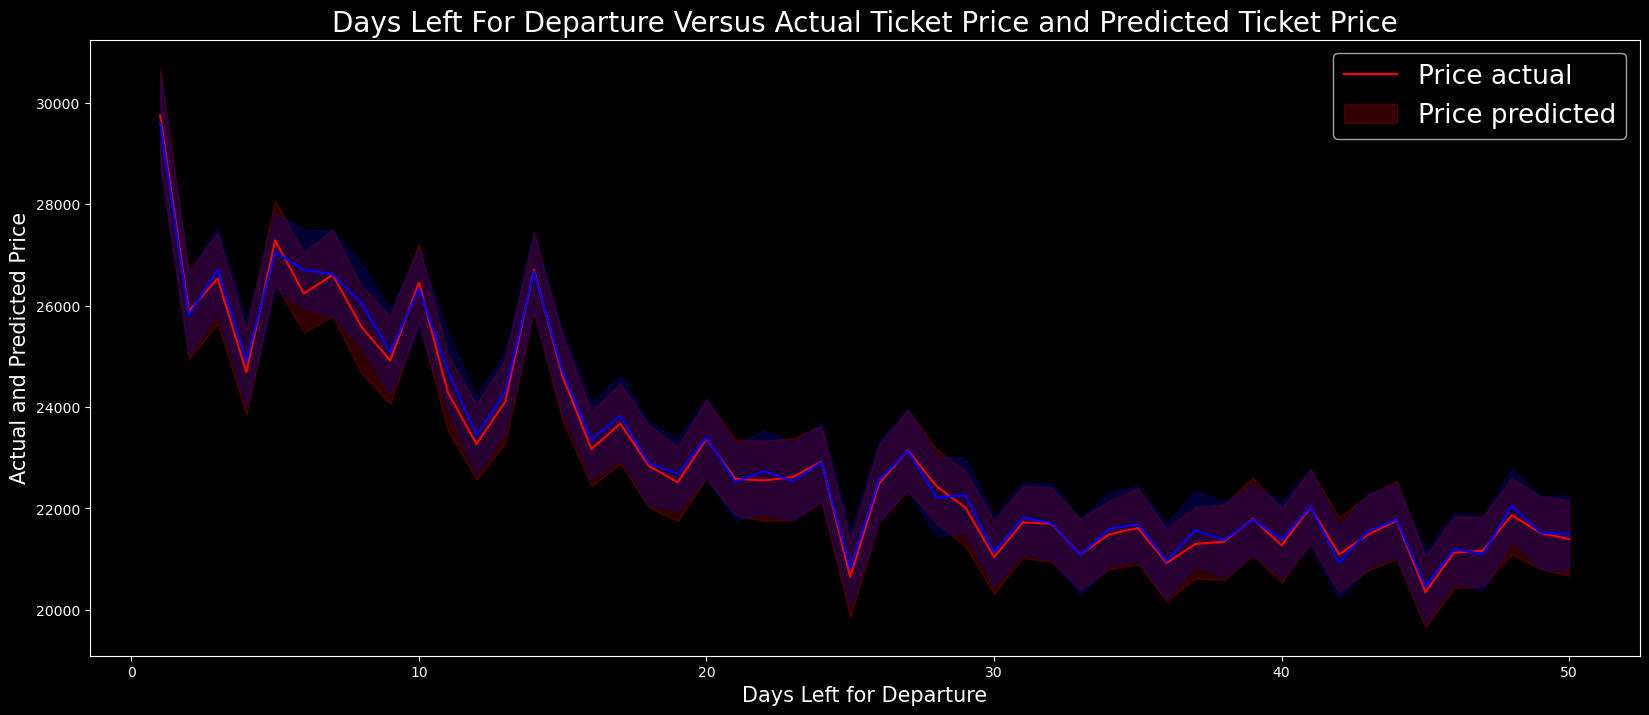

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='Days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='Days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

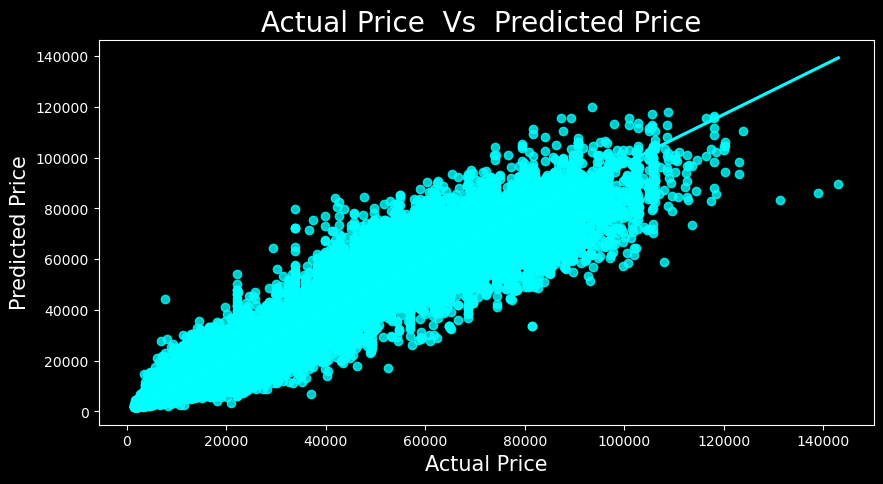

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        IF YOU LIKED THE NOTEBOOK PLEASE DO UPVOTE!  
    </h2>
    </div>

Thanks for sparing your time! Do upvote if you liked it, This motivates hugely to come up with new explorations and keep exploring new domains. 

It would be really nice if you check my other works and if you like my work then don't forget to follow for more interesting notebooks 🤗